In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble.forest import RandomForestRegressor

C:\Users\anshc\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Feature ranking:
1. Staff 0.182757 
2. Value for money 0.148373 
3. Shared space condition 0.128296 
4. Extra services 0.116604 
5. Customer Co-creation 0.106668 
6. General conditions & conveniences 0.088589 
7. Shared kitchen condition 0.074273 
8. Check-in and check-out 0.061521 
9. Hostel booking 0.053615 
10. Room condition 0.039305 


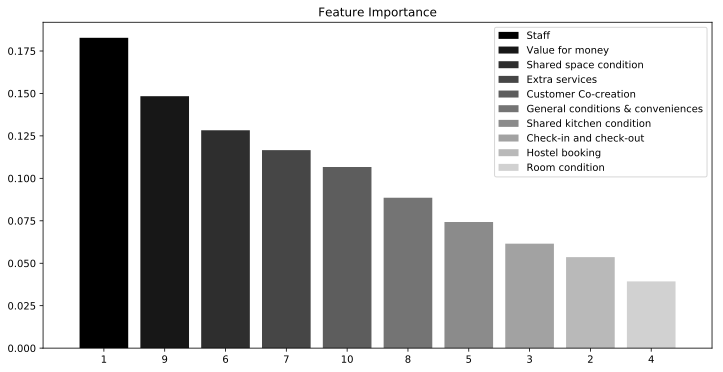

In [2]:
hostel_data = pd.read_csv("hostel_factors.csv")
features = {"f1":u"Staff",
            "f2":u"Hostel booking",
            "f3":u"Check-in and check-out",
            "f4":u"Room condition",
            "f5":u"Shared kitchen condition",
            "f6":u"Shared space condition",
            "f7":u"Extra services",
            "f8":u"General conditions & conveniences",
            "f9":u"Value for money",
            "f10":u"Customer Co-creation"}

forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(12,6))
plt.title(u"Feature Importance")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);